In [0]:
#Importing essential libraries
import numpy as np
import pandas as pd
import os
import zipfile

# Data Extraction and Preparation

In [0]:
#Extracting all the data
zip_ref = zipfile.ZipFile('data_scientist_take-home.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [0]:
#Creating a dataframe out of the summary file
summary_df = pd.read_csv('data_scientist_take-home/summary_data.csv')

In [5]:
#Checking for missing values
summary_df.isnull().sum()

flight_id                 0
air_temperature           0
battery_serial_number     0
body_serial_number        0
commit                    0
launch_airspeed           0
launch_groundspeed        0
launch_timestamp          0
preflight_voltage        16
rel_humidity              0
static_pressure           0
wind_direction            0
wind_magnitude            0
wing_serial_number        0
dtype: int64

In [6]:
#Displaying the head of the dataset
summary_df.head()

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number
0,16951,20.550000,15SPJJJ09036021,577350132807348254,5c504d9a16,32.453445,30.164656,2018-09-06 07:43:59 CAT,NaN,74.150000,80662.081736,-49.434555,1.949338,15SPJJJ11024054
1,16952,20.500000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.141209,30.535246,2018-09-06 07:51:49 CAT,NaN,71.175044,80708.065314,-4.408768,0.917357,15SPJJJ09011032
2,16954,24.475019,15SPJJJ10012034,577209618523054122,5c504d9a16,34.701878,29.872613,2018-09-06 09:56:37 CAT,NaN,66.374982,80774.270438,-23.458781,3.788383,15SPJJJ09011032
3,16955,27.300000,15SPJJJ10054027,577209618523082792,5c504d9a16,34.368999,29.877624,2018-09-06 10:27:04 CAT,NaN,59.000000,80805.138793,-46.747881,3.921605,15SPJJJ11049056
4,16957,26.950000,15SPJJJ10050049,577348835962150933,5c504d9a16,32.898979,30.027183,2018-09-06 11:09:39 CAT,NaN,63.900000,80768.969307,-29.293360,2.975881,15SPJJJ09031032


In [0]:
#Getting a list of files for specific flight data
import os
files = os.listdir("data_scientist_take-home")
for i in files:
  if 'csv' not in i or i == 'summary_data.csv':
    files.remove(i)

In [0]:
#Creating a dictionary of dataframes for different flights
def make_df(name):
    df = pd.read_csv('data_scientist_take-home/'+name)
    return df
  
dict_of_dfs = dict()
df_names = files        #a list of all the dataframes you want to create

for file in df_names:
    dict_of_dfs[file] = make_df(file)
    dict_of_dfs[file]['flight_id'] =  np.nan
    dict_of_dfs[file]['flight_id'] = dict_of_dfs[file]['flight_id'].fillna(int(file[7:-4]))

In [0]:
#Merging all the individual flight dataframes into one entire large dataset for analysis
completedata_df = pd.DataFrame()
for x in dict_of_dfs:
  completedata_df = pd.concat([completedata_df, dict_of_dfs[x]])

In [10]:
#Checking whether there are null values in the dataset
completedata_df.isnull().sum()

seconds_since_launch          0
position_ned_m[0]             0
position_ned_m[1]             0
position_ned_m[2]             0
velocity_ned_mps[0]           0
velocity_ned_mps[1]           0
velocity_ned_mps[2]           0
accel_body_mps2[0]            0
accel_body_mps2[1]            0
accel_body_mps2[2]            0
orientation_rad[0]            0
orientation_rad[1]            0
orientation_rad[2]            0
angular_rate_body_radps[0]    0
angular_rate_body_radps[1]    0
angular_rate_body_radps[2]    0
position_sigma_ned_m[0]       0
position_sigma_ned_m[1]       0
position_sigma_ned_m[2]       0
flight_id                     0
dtype: int64

In [0]:
#Resetting the index of the dataframe
completedata_df.reset_index(drop = True ,inplace= True)
#Merging the summary dataframe to the large dataset
completedata_df = pd.merge(completedata_df,summary_df, how = 'left', on = 'flight_id' )

In [12]:
#Displaying columns in the huge dataset
completedata_df.columns

Index(['seconds_since_launch', 'position_ned_m[0]', 'position_ned_m[1]',
       'position_ned_m[2]', 'velocity_ned_mps[0]', 'velocity_ned_mps[1]',
       'velocity_ned_mps[2]', 'accel_body_mps2[0]', 'accel_body_mps2[1]',
       'accel_body_mps2[2]', 'orientation_rad[0]', 'orientation_rad[1]',
       'orientation_rad[2]', 'angular_rate_body_radps[0]',
       'angular_rate_body_radps[1]', 'angular_rate_body_radps[2]',
       'position_sigma_ned_m[0]', 'position_sigma_ned_m[1]',
       'position_sigma_ned_m[2]', 'flight_id', 'air_temperature',
       'battery_serial_number', 'body_serial_number', 'commit',
       'launch_airspeed', 'launch_groundspeed', 'launch_timestamp',
       'preflight_voltage', 'rel_humidity', 'static_pressure',
       'wind_direction', 'wind_magnitude', 'wing_serial_number'],
      dtype='object')

# Data Analysis

There are 16 flights for which "preflight_voltage" is missing.

The following flights which were launched on the 6th of September have missing preflight voltage Data

---



In [13]:
#Flights with missing voltage data
summary_df[summary_df['preflight_voltage'].isnull()][['flight_id','launch_timestamp','battery_serial_number']].sort_values('battery_serial_number')



,flight_id,launch_timestamp,battery_serial_number
13,16984,2018-09-06 17:56:06 CAT,15SPJJJ09013015
6,16960,2018-09-06 12:55:23 CAT,15SPJJJ09017016
5,16959,2018-09-06 11:31:07 CAT,15SPJJJ09018015
0,16951,2018-09-06 07:43:59 CAT,15SPJJJ09036021
10,16967,2018-09-06 15:02:27 CAT,15SPJJJ09036021
15,16986,2018-09-06 18:25:40 CAT,15SPJJJ09036021
17,16988,2018-09-06 18:59:13 CAT,15SPJJJ10008029
2,16954,2018-09-06 09:56:37 CAT,15SPJJJ10012034
7,16961,2018-09-06 13:09:51 CAT,15SPJJJ10023027
1,16952,2018-09-06 07:51:49 CAT,15SPJJJ10029029


In [14]:
#Basic Analysis of Body Part Counts. As per the description the flights have 3 main parts Wing, Body and Battery

wing_count = len(summary_df['wing_serial_number'].unique())
battery_count = len(summary_df['battery_serial_number'].unique())
body_count = len(summary_df['body_serial_number'].unique())
flight_count = len(summary_df['flight_id'].unique())


frame = pd.DataFrame(data =[wing_count, battery_count, body_count, flight_count], index= ['Wings', 'Batteries', 'Bodies', 'Flights'], columns = ['Count'])
frame

,Count
Wings,18
Batteries,26
Bodies,15
Flights,447


In [0]:
#Datetime stripping for Summary Data
from datetime import datetime
summary_df['launch_timestamp'] = [x[:-4] for x in summary_df['launch_timestamp']]
summary_df['launch_timestamp'] = summary_df['launch_timestamp'].apply(lambda x:  datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [0]:
#Sort the values by lauch time
summary_df = summary_df.sort_values(by='launch_timestamp')


In [0]:
#Creating a dataframe to analyze daily weather patterns
weather_df = summary_df.groupby([summary_df['launch_timestamp'].dt.month,summary_df['launch_timestamp'].dt.day])[['air_temperature','rel_humidity', 'wind_magnitude']].mean()
weather_df = weather_df.reset_index(level=[1])
weather_df = weather_df.rename(columns={'launch_timestamp':'Day'})
weather_df = weather_df.reset_index(level=[0])
weather_df = weather_df.rename(columns={'launch_timestamp':'Month'})

weather_df['Day'] = weather_df['Month'].map(str) + '/' + weather_df['Day'].map(str)
air_temp =  weather_df['air_temperature']
rel_hum = weather_df['rel_humidity']
wind_mag = weather_df['wind_magnitude']

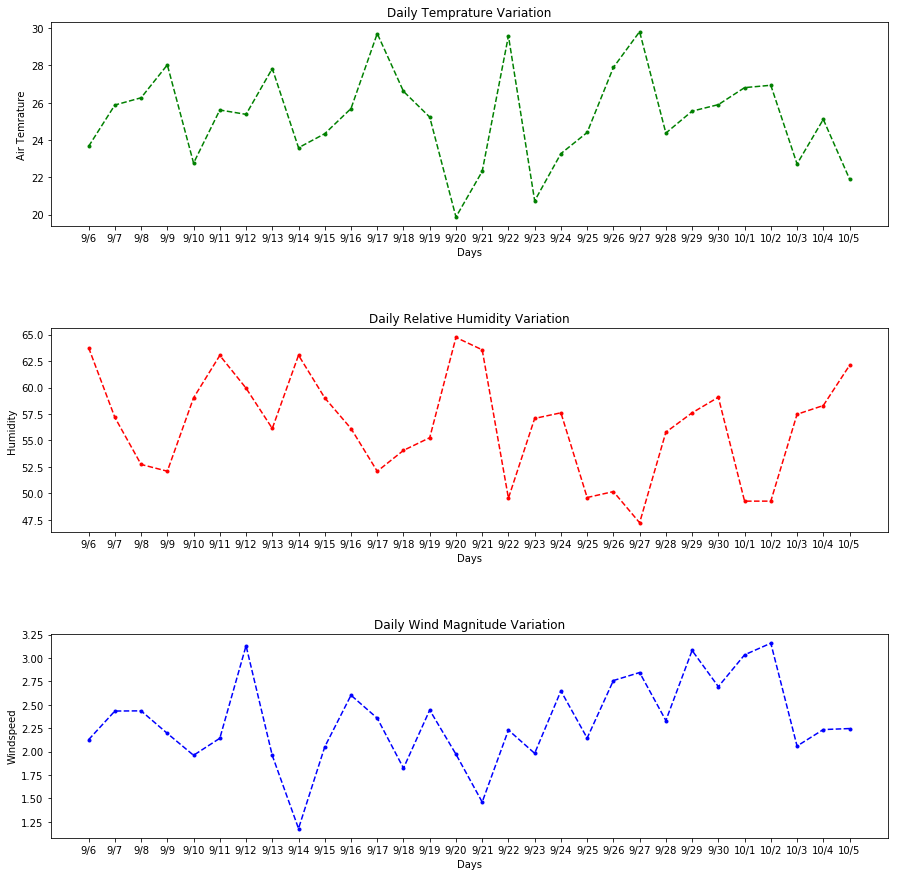

In [18]:
#Plotting mean daily Air Temprature variations
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)
# plt.plot(np.arange(1,31), air_temp)

plt.subplot(3, 1, 1,)
plt.plot(weather_df['Day'], air_temp, 'g.--')
plt.title('Daily Temprature Variation')
plt.xlabel('Days')
plt.ylabel('Air Temrature')

plt.subplot(3, 1, 2) 
plt.plot(weather_df['Day'], rel_hum, 'r.--')
plt.title('Daily Relative Humidity Variation')
plt.xlabel('Days')
plt.ylabel('Humidity')

plt.subplot(3, 1, 3) 
plt.plot(weather_df['Day'], wind_mag, 'b.--')
plt.title('Daily Wind Magnitude Variation')
plt.xlabel('Days')
plt.ylabel('Windspeed')

plt.show()

From the above plots it can be seen that on the 1st and 2nd of October there was a clear case of diurnal air temprature , relative humidity patterns. Additionally, there was a diurnal wind magnitude patern on the 4th and 5th of October.

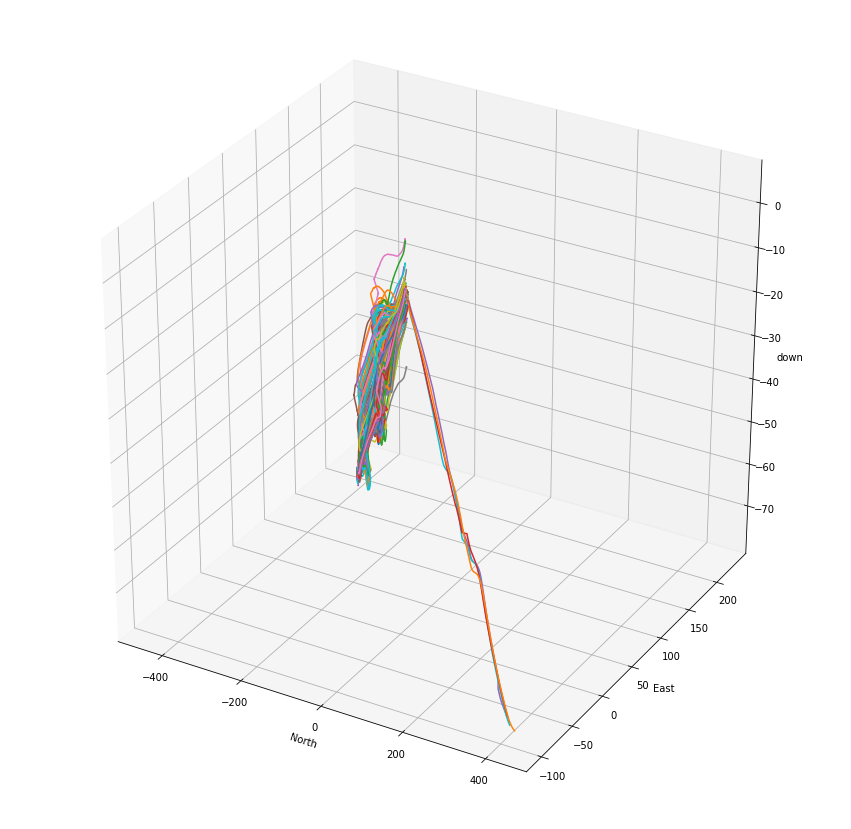

In [19]:
#Finding flights that have outlier launches
fig = plt.figure(figsize=(15, 15))
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')

for i in range(447):
  north = dict_of_dfs[files[i]]['position_ned_m[0]']
  east = dict_of_dfs[files[i]]['position_ned_m[1]']
  down = dict_of_dfs[files[i]]['position_ned_m[2]']

  xs = north
  ys = east
  zs = down
  ax.plot(xs, ys, zs)

ax.set_xlabel('North')
ax.set_ylabel('East')
ax.set_zlabel('down')

plt.show()

In [20]:
#Displaying the flights with outlier launches
pos_outlier_flights = completedata_df[completedata_df['position_ned_m[0]']>200][['flight_id']].flight_id.unique()
frame_outlier = pd.DataFrame(columns =['flight_id', 'launch_timestamp'])
for i in pos_outlier_flights:
  x = summary_df[['flight_id', 'launch_timestamp']][summary_df['flight_id'] == int(i)]
  frame_outlier = frame_outlier.append(x)
frame_outlier

,flight_id,launch_timestamp
253,17438,2018-09-24 19:30:15
252,17437,2018-09-24 19:25:52
254,17439,2018-09-24 19:34:41
90,17136,2018-09-11 18:54:21


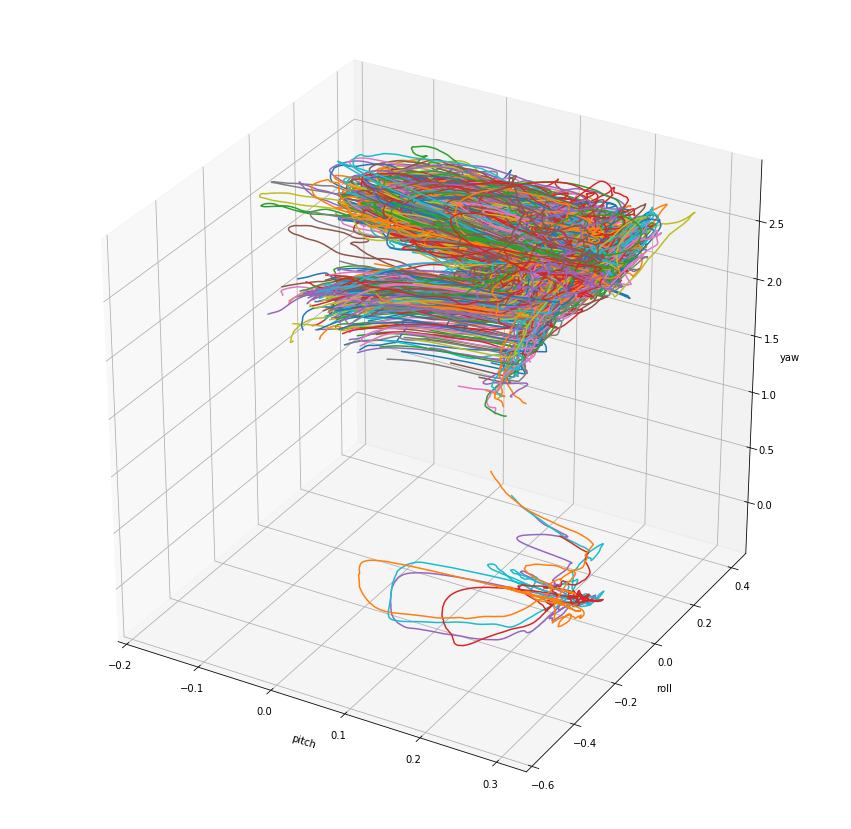

In [21]:
#Finding flights that have different roll/pitch/yaw 
fig = plt.figure(figsize=(15, 15))
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')

for i in range(446):
  roll = dict_of_dfs[files[i]]['orientation_rad[0]']
  pitch = dict_of_dfs[files[i]]['orientation_rad[1]']
  yaw = dict_of_dfs[files[i]]['orientation_rad[2]']

  xs = pitch
  ys = roll
  zs = yaw
  ax.plot(xs, ys, zs)

ax.set_xlabel('pitch')
ax.set_ylabel('roll')
ax.set_zlabel('yaw')

plt.show()

In [0]:
#As you can see there are some flights where there was negligible yaw, the rudder is responsible for the yaw
yaw_problem_flights = completedata_df[completedata_df['orientation_rad[2]']<0][['flight_id']].flight_id.unique()
frame_yaw = pd.DataFrame(columns =['flight_id', 'launch_timestamp', ])
for i in yaw_problem_flights:
  g = summary_df[['flight_id', 'launch_timestamp']][summary_df['flight_id'] == int(i)]
  frame_yaw = frame_yaw.append(g)

In [23]:
#These are the flights and their launchtimes where there were problems with the Yaw 
frame_yaw

,flight_id,launch_timestamp
253,17438,2018-09-24 19:30:15
252,17437,2018-09-24 19:25:52
254,17439,2018-09-24 19:34:41
90,17136,2018-09-11 18:54:21


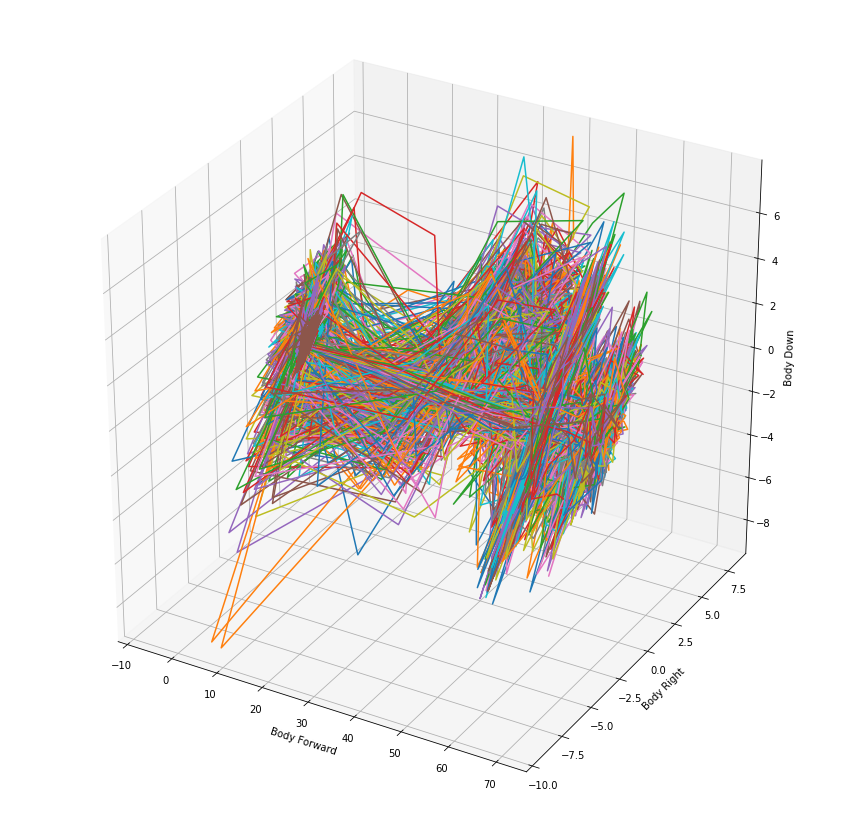

In [24]:
#Acceleration of the body outliers
fig = plt.figure(figsize=(15, 15))
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')

for i in range(446):
  bodyfw = dict_of_dfs[files[i]]['accel_body_mps2[0]']
  bodyrt = dict_of_dfs[files[i]]['accel_body_mps2[1]']
  bodydwn = dict_of_dfs[files[i]]['accel_body_mps2[1]']

  xs = bodyfw
  ys = bodyrt
  zs = bodydwn
  ax.plot(xs, ys, zs)

ax.set_xlabel('Body Forward')
ax.set_ylabel('Body Right')
ax.set_zlabel('Body Down')

plt.show()

The analysis above shows that there are two flights which accelerate heavily in the negative direction in terms of the body-right axis;

In [25]:
negative_bodyrt_flights = completedata_df[completedata_df['accel_body_mps2[1]']<-7.5][['flight_id']].flight_id.unique()
frame_acc_outliers = pd.DataFrame(columns =['flight_id', 'launch_timestamp'])
for i in negative_bodyrt_flights:
  g = summary_df[['flight_id', 'launch_timestamp']][summary_df['flight_id'] == int(i)]
  frame_acc_outliers  = frame_acc_outliers .append(g)
frame_acc_outliers

,flight_id,launch_timestamp
104,17160,2018-09-12 16:07:26
17,16988,2018-09-06 18:59:13


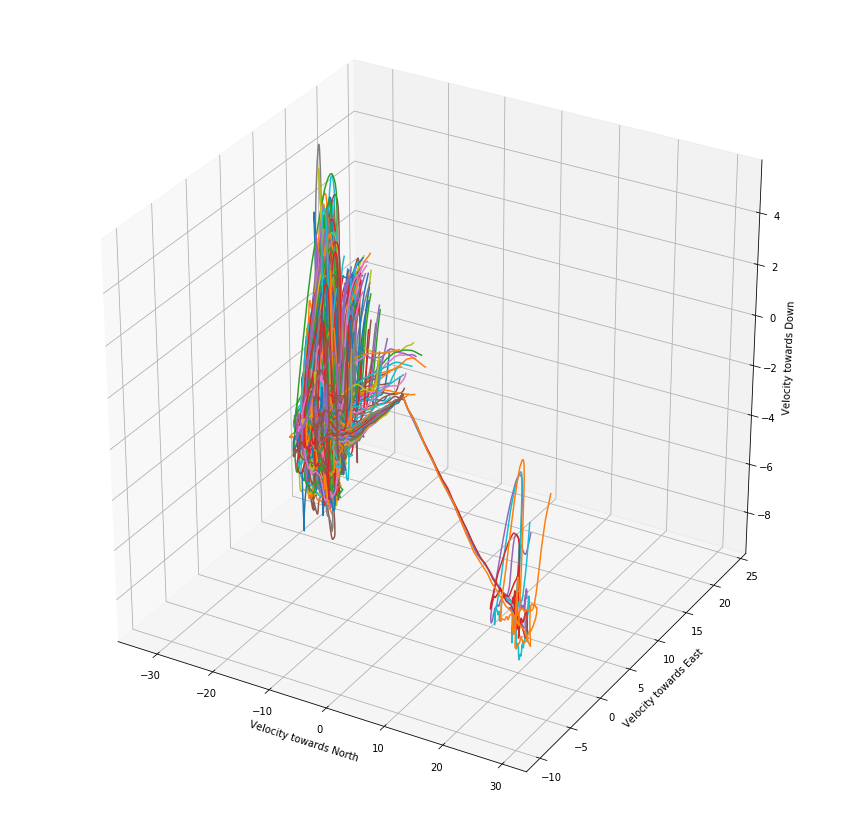

In [26]:
#Velocity of the Zip
fig = plt.figure(figsize=(15, 15))
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')

for i in range(446):
  vel_north = dict_of_dfs[files[i]]['velocity_ned_mps[0]']
  vel_east = dict_of_dfs[files[i]]['velocity_ned_mps[1]']
  vel_down = dict_of_dfs[files[i]]['velocity_ned_mps[2]']

  xs = vel_north
  ys = vel_east
  zs = vel_down 
  ax.plot(xs, ys, zs)

ax.set_xlabel('Velocity towards North')
ax.set_ylabel('Velocity towards East')
ax.set_zlabel('Velocity towards Down')

plt.show()

In [27]:
#flights that have a velocity in another direction
Northbound_vel_flights = completedata_df[completedata_df['velocity_ned_mps[0]']>0][['flight_id']].flight_id.unique()
frame4 = pd.DataFrame(columns =['flight_id', 'launch_timestamp'])
for i in Northbound_vel_flights:
  c = summary_df[['flight_id', 'launch_timestamp']][summary_df['flight_id'] == int(i)]
  frame4 = frame4.append(c)
frame4

,flight_id,launch_timestamp
253,17438,2018-09-24 19:30:15
252,17437,2018-09-24 19:25:52
254,17439,2018-09-24 19:34:41
90,17136,2018-09-11 18:54:21


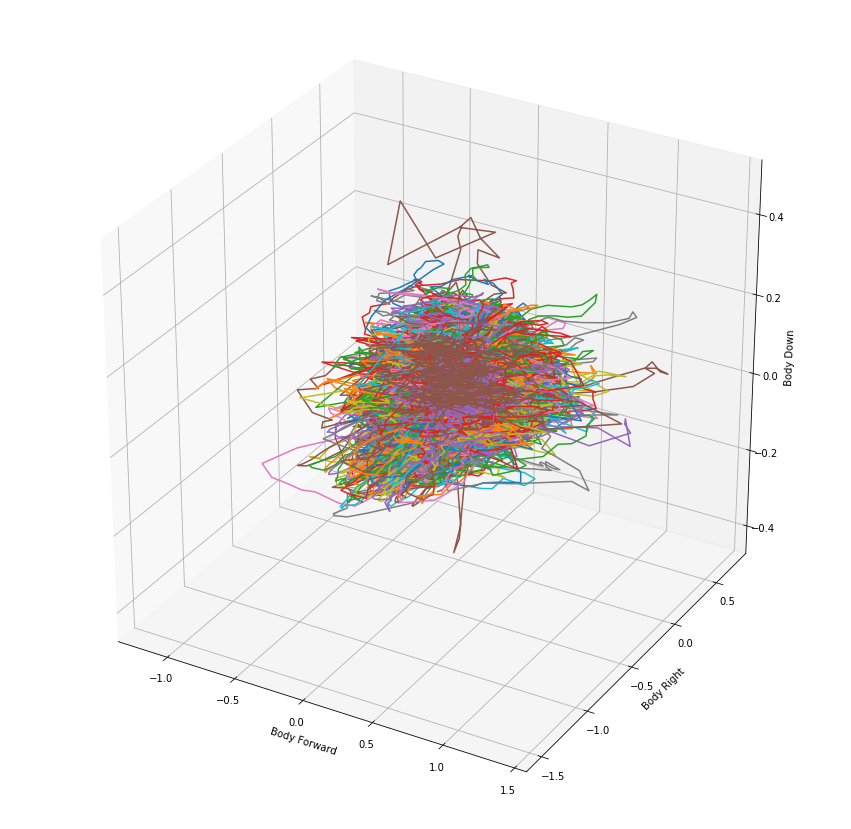

In [28]:
#Angular Acceleration of the flight body
fig = plt.figure(figsize=(15, 15))
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')

for i in range(446):
  bodyfw = dict_of_dfs[files[i]]['angular_rate_body_radps[0]']
  bodyrt = dict_of_dfs[files[i]]['angular_rate_body_radps[1]']
  bodydwn = dict_of_dfs[files[i]]['angular_rate_body_radps[2]']

  xs = bodyfw
  ys = bodyrt
  zs = bodydwn
  ax.plot(xs, ys, zs)

ax.set_xlabel('Body Forward')
ax.set_ylabel('Body Right')
ax.set_zlabel('Body Down')

plt.show()

In [31]:
#Flight with negative angular acceleration in terms of the down direction
highlynegative_body_down = completedata_df[completedata_df['angular_rate_body_radps[2]']<-0.4][['flight_id']].flight_id.unique()
highlynegative_body_down[0]

17286.0

In [32]:
#Flight with positive angular acceleration in terms of the down direction
highlypositive_body_down = completedata_df[completedata_df['angular_rate_body_radps[2]']>0.3][['flight_id']].flight_id.unique()
highlypositive_body_down[0]

17286.0

Summary of findings

**Flights that are outliers, have  irregular yaw, irregular velocity:**

*   17438
*   17436
*   17439
*   17437


**Flights which accelerate heavily in the negative direction in terms of the body-right axis**


*   16988
*   17160


**Flight that has highly irregular angular accelerations**


*   17286





In [95]:
#Checking Body parts used for outlier Flights
pos_outlier_flights = completedata_df[completedata_df['position_ned_m[0]']>200][['flight_id']].flight_id.unique()
frame_outlier = pd.DataFrame(columns =['flight_id','launch_timestamp', 'body_serial_number', 'battery_serial_number', 'wing_serial_number'])
for i in pos_outlier_flights:
  x = summary_df[['flight_id','launch_timestamp', 'body_serial_number', 'battery_serial_number', 'wing_serial_number']][summary_df['flight_id'] == int(i)]
  frame_outlier = frame_outlier.append(x)
frame_outlier

,flight_id,launch_timestamp,body_serial_number,battery_serial_number,wing_serial_number
253,17438,2018-09-24 19:30:15,577350132807348254,15SPJJJ10022048,15SPJJJ09040032
90,17136,2018-09-11 18:54:21,577350132840894487,15SPJJJ10027028,15SPJJJ09043062
254,17439,2018-09-24 19:34:41,577348835962105883,15SPJJJ10023027,15SPJJJ09019061
252,17437,2018-09-24 19:25:52,577350132840857611,15SPJJJ10048030,15SPJJJ09024061


In [96]:
#Checking Body parts used for Acceleration Outlier flights
negative_bodyrt_flights = completedata_df[completedata_df['accel_body_mps2[1]']<-7.5][['flight_id']].flight_id.unique()
frame_acc_outliers = pd.DataFrame(columns =['flight_id','launch_timestamp', 'body_serial_number', 'battery_serial_number', 'wing_serial_number'])
for i in negative_bodyrt_flights:
  g = summary_df[['flight_id','launch_timestamp', 'body_serial_number', 'battery_serial_number', 'wing_serial_number']][summary_df['flight_id'] == int(i)]
  frame_acc_outliers  = frame_acc_outliers .append(g)
frame_acc_outliers

,flight_id,launch_timestamp,body_serial_number,battery_serial_number,wing_serial_number
17,16988,2018-09-06 18:59:13,577209618523082792,15SPJJJ10008029,15SPJJJ11049056
104,17160,2018-09-12 16:07:26,577350132790558758,15SPJJJ10012034,15SPJJJ11049056


In [97]:
#Checking Body parts used for angular Acceleration Outlier flights
summary_df[['flight_id','launch_timestamp', 'body_serial_number', 'battery_serial_number', 'wing_serial_number']][summary_df['flight_id'] == 17286]

,flight_id,launch_timestamp,body_serial_number,battery_serial_number,wing_serial_number
174,17286,2018-09-18 16:09:23,577350132807348254,15SPJJJ10050016,15SPJJJ09024061


# Machine Learning Application (Location Predictions)

In [0]:
#Dataframe creation with NED location co-ordinates at 15s after launch

pos15_df = pd.DataFrame(columns =['flight_id','position_ned_m[0]','position_ned_m[1]','position_ned_m[2]'])
for i in range(447):
  frame = dict_of_dfs[files[i]][['flight_id','position_ned_m[0]','position_ned_m[1]','position_ned_m[2]']][-1:]
  pos15_df = pos15_df.append(frame)

In [100]:
#Displaying the head of the created dataframe
pos15_df.head()

,flight_id,position_ned_m[0],position_ned_m[1],position_ned_m[2]
1000,17450.0,-395.58405,180.34903,-77.191734
1000,17016.0,-385.62610,172.89882,-76.215000
1000,17501.0,-417.12503,194.95697,-76.970610
1000,17587.0,-384.98694,180.93030,-75.871060
1000,17723.0,-389.86847,177.14984,-76.996650


In [0]:
#Creating a large dataframe by merging 
endingpos_df = pd.merge(summary_df,pos15_df, on = 'flight_id' )

In [0]:
#dropping null value records
endingpos_df = endingpos_df.dropna()

In [107]:
#Displaying the head of the dataframe
endingpos_df.head()

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number,position_ned_m[0],position_ned_m[1],position_ned_m[2]
14,16985,18.600000,15SPJJJ10023027,577209618523082792,5c504d9a16,29.986822,30.179998,2018-09-06 18:08:27,32.151962,63.75000,80576.399674,158.021111,1.417388,15SPJJJ09031032,-407.47244,189.92056,-76.66840
16,16987,18.400000,15SPJJJ10052026,577350132807348254,5c504d9a16,28.834124,30.829009,2018-09-06 18:53:48,32.312931,68.25000,80493.808033,144.955296,1.199771,15SPJJJ09011032,-435.02362,209.82922,-69.06078
18,16989,23.174991,15SPJJJ09013015,577350132807348254,5c504d9a16,30.789320,30.247556,2018-09-07 08:15:22,31.841904,70.15000,80651.937754,-41.720551,1.500698,15SPJJJ11024054,-391.74190,178.05086,-76.65230
19,16990,23.750000,15SPJJJ09017016,577348835962155029,5c504d9a16,32.471699,30.016797,2018-09-07 08:22:40,32.254593,65.80000,80717.923737,-50.509133,1.659457,15SPJJJ09032034,-388.70004,177.07257,-76.91219
20,16991,23.524990,15SPJJJ10060032,577348835962150933,5c504d9a16,32.759796,30.067002,2018-09-07 09:08:24,32.046089,69.67501,80720.523627,-35.448289,3.815549,15SPJJJ11024054,-386.22437,174.14307,-75.65067


In [0]:
#Determining the predictor variables X and the target variable Y
X = endingpos_df[['air_temperature', 'launch_airspeed', 'launch_groundspeed', 'preflight_voltage', 'rel_humidity','static_pressure', 'wind_direction', 'wind_magnitude']]
y = endingpos_df[['position_ned_m[0]', 'position_ned_m[1]', 'position_ned_m[2]']]

In [0]:
#Normalising the predictor variables X
X = (X -np.mean(X))/np.std(X)

#Splitting the data into training and validation. Split as 90:10 due to low number of records
from sklearn.model_selection import train_test_split as ts
X_train, X_test, y_train, y_test = ts(X, y, test_size=0.1, random_state=101)

# Linear Regression Model

In [110]:
#Importing additional Libraries
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#Fitting
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
#Predictions for the model
from sklearn import metrics
pred1 = lr.predict(X_test)
mae_lr = metrics.mean_absolute_error(y_test,pred1)
mse_lr = metrics.mean_squared_error(y_test, pred1)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, pred1))
r2_lr = metrics.r2_score(y_test, pred1)

print( mae_lr, mse_lr, rmse_lr, r2_lr )

9.371903076315308 322.79591550346663 17.966522075890666 -1.569598465695667


# Decision Tree Model

In [118]:
#Importing additional Libraries
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
#Fitting
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [119]:
#Predictions for the model
pred2 = dt.predict(X_test)
mae_dt = metrics.mean_absolute_error(y_test,pred2)
mse_dt = metrics.mean_squared_error(y_test, pred2)
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test, pred2))
r2_dt = metrics.r2_score(y_test, pred2)

print( mae_dt, mse_dt, rmse_dt, r2_dt )

4.342572833333329 39.31961904370342 6.2705357860156905 0.4603431893598822


# Accuracy Measurements of the models

In [115]:
a = np.array([mae_lr,mse_lr,rmse_lr, r2_lr])
b = np.array([mae_dt,mse_dt,rmse_dt, r2_dt])
x = pd.DataFrame(data =[a,b],columns = ['MAE','MSE','RMSE', 'R-Squared'], index = ['Multiple Linear Regression', 'Decision Tree Regression'])
x

,MAE,MSE,RMSE,R-Squared
Multiple Linear Regression,9.371903,322.795916,17.966522,-1.569598
Decision Tree Regression,4.444982,37.916354,6.157626,0.462751
